In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [111]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [113]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [114]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of      PassengerId  Survived  Pclass   
0              1         0       3  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp   
0                              Braund, Mr. Owen Harris    male  22.0      1  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                        

In [115]:
# Handling missing values: fill missing 'age' values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [116]:
# Correcting data entry errors: replace any negative 'fare' values with the median fare
df.loc[df['Fare'] < 0, 'Fare'] = df['Fare'].median()

# Converting data types: convert 'sex' variable to a categorical data type
df['Sex'] = df['Sex'].astype('category')

# Addressing outliers: remove rows where 'fare' is greater than 3 standard deviations from the mean
fare_mean = df['Fare'].mean()
fare_std = df['Fare'].std()
df = df[(df['Fare'] >= fare_mean - 3 * fare_std) & (df['Fare'] <= fare_mean + 3 * fare_std)]

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  871 non-null    int64   
 1   Survived     871 non-null    int64   
 2   Pclass       871 non-null    int64   
 3   Name         871 non-null    object  
 4   Sex          871 non-null    category
 5   Age          871 non-null    float64 
 6   SibSp        871 non-null    int64   
 7   Parch        871 non-null    int64   
 8   Ticket       871 non-null    object  
 9   Fare         871 non-null    float64 
 10  Cabin        187 non-null    object  
 11  Embarked     869 non-null    object  
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 82.6+ KB


   PassengerId  Survived  Pclass   
0            1         0       3  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp   
0                            Braund, Mr. Owen Harris    male  22.0      1  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


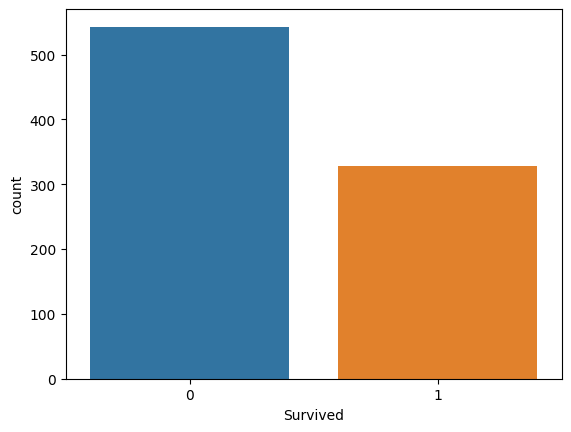

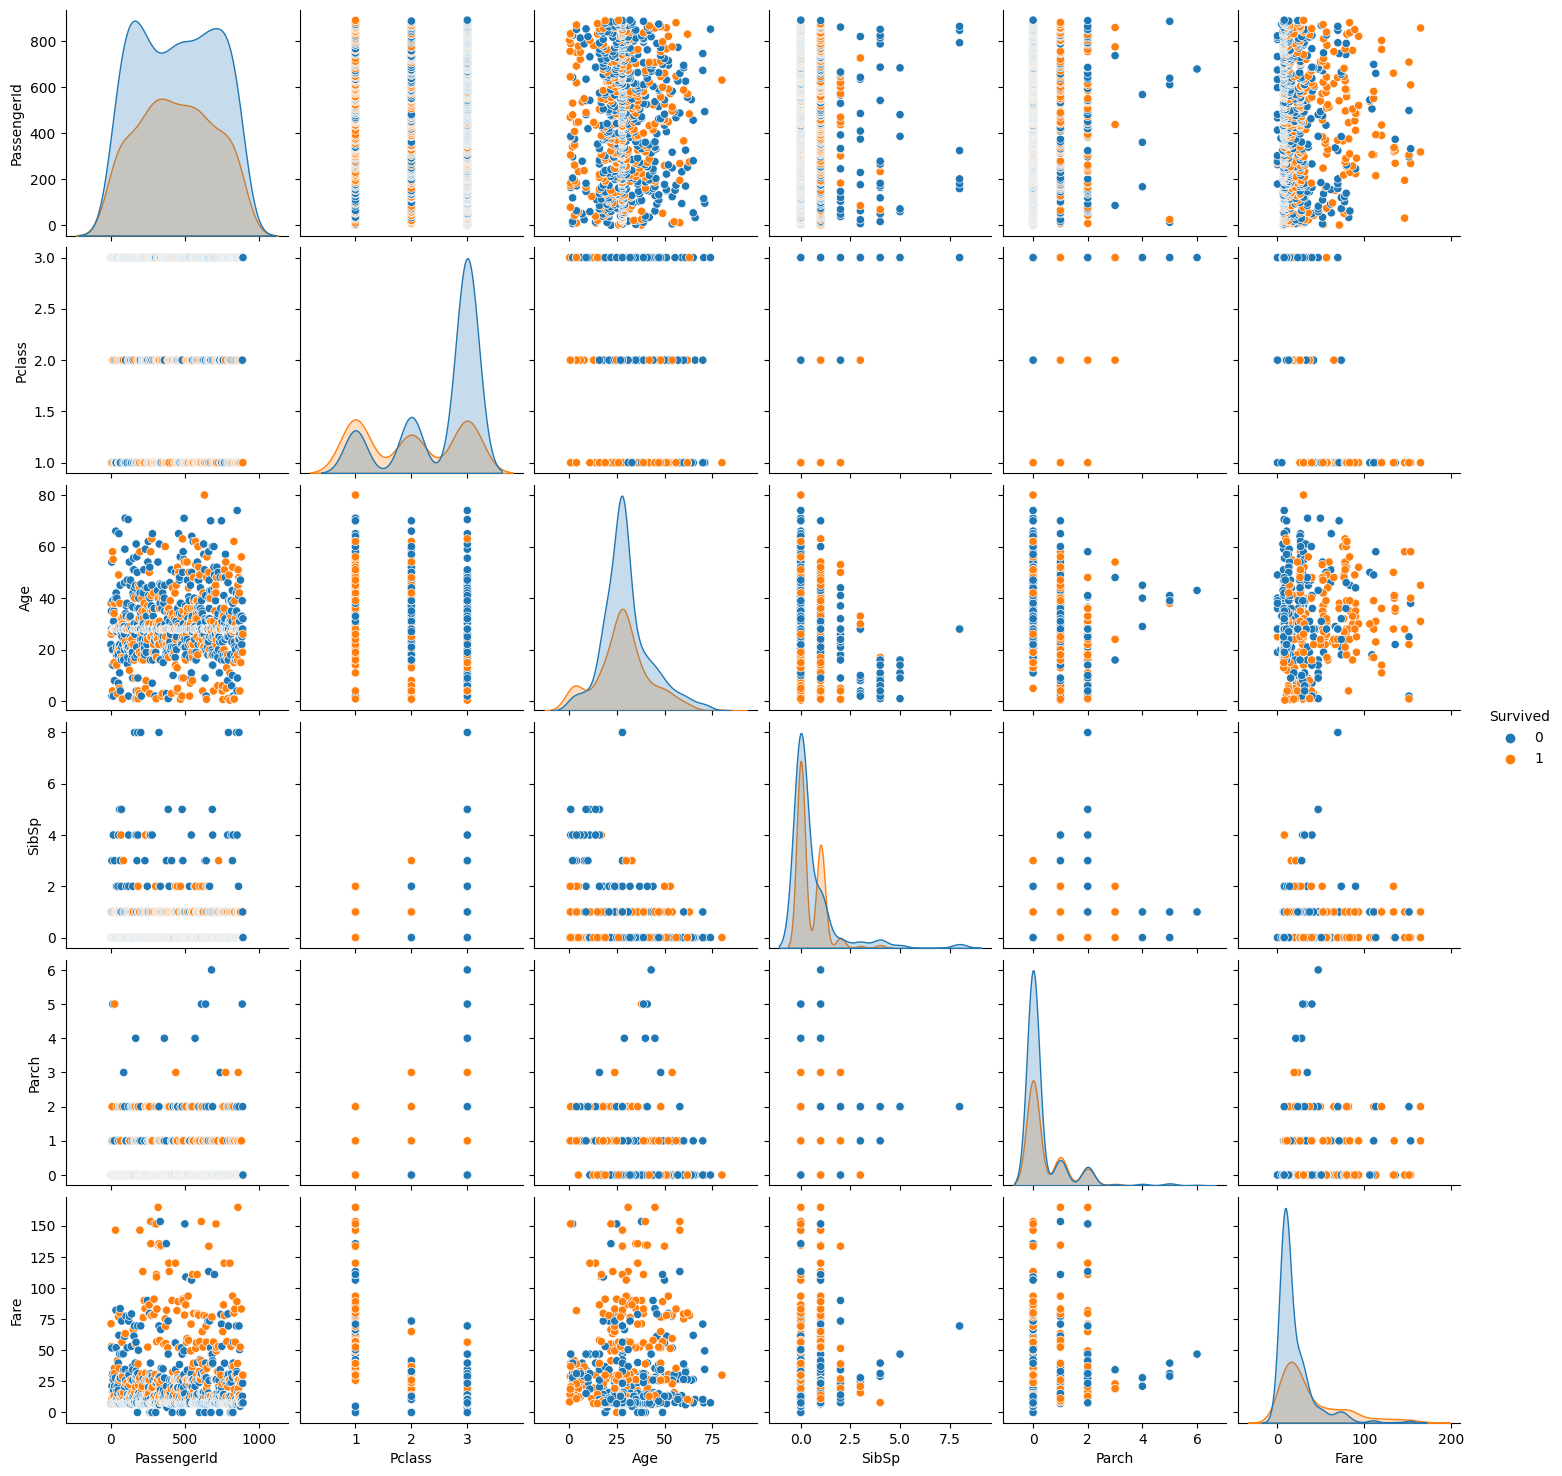

In [78]:
# Print the first few rows of the dataframe
print(df.head())

# Display the distribution of 'Survived'
sns.countplot(x='Survived', data=df)
plt.show()

# More detailed exploration
sns.pairplot(df, hue='Survived')
plt.show()

In [118]:
from sklearn.datasets import load_iris

In [119]:
data = load_iris()

In [120]:
iris = pd.DataFrame(np.c_[data['data'],data['target']])

In [121]:
# Load the dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [122]:
# Pipeline: Integrate preprocessing into the training process
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
])

# Number of bootstrap samples and trees in the ensemble
n_samples = len(X_train)
n_trees = 50

def bootstrap_sample(X, y):
    indices = np.random.choice(len(X), size=len(X), replace=True)
    return X[indices], y[indices]


In [123]:
# Train multiple decision trees on different bootstrap samples
trees = []
for _ in range(n_trees):
    X_sample, y_sample = bootstrap_sample(X_train, y_train)
    
    # Clone the pipeline for each tree
    cloned_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('clf', DecisionTreeClassifier())])
    cloned_pipeline.fit(X_sample, y_sample)
    trees.append(cloned_pipeline)

In [124]:
trees

[Pipeline(steps=[('scaler', StandardScaler()),
                 ('clf', DecisionTreeClassifier())]),
 Pipeline(steps=[('scaler', StandardScaler()),
                 ('clf', DecisionTreeClassifier())]),
 Pipeline(steps=[('scaler', StandardScaler()),
                 ('clf', DecisionTreeClassifier())]),
 Pipeline(steps=[('scaler', StandardScaler()),
                 ('clf', DecisionTreeClassifier())]),
 Pipeline(steps=[('scaler', StandardScaler()),
                 ('clf', DecisionTreeClassifier())]),
 Pipeline(steps=[('scaler', StandardScaler()),
                 ('clf', DecisionTreeClassifier())]),
 Pipeline(steps=[('scaler', StandardScaler()),
                 ('clf', DecisionTreeClassifier())]),
 Pipeline(steps=[('scaler', StandardScaler()),
                 ('clf', DecisionTreeClassifier())]),
 Pipeline(steps=[('scaler', StandardScaler()),
                 ('clf', DecisionTreeClassifier())]),
 Pipeline(steps=[('scaler', StandardScaler()),
                 ('clf', DecisionTreeClassif

In [125]:
# Aggregate predictions
predictions = np.zeros((len(X_test), n_trees))
for tree_index, tree in enumerate(trees):
    predictions[:, tree_index] = tree.predict(X_test)

In [126]:
predictions

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [2., 2., 2., ..., 2., 2., 2.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [127]:
# Majority vote
y_pred = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=predictions.astype('int'))

In [25]:
# Test accuracy
print(f"Accuracy (Custom Bagged Trees): {accuracy_score(y_test, y_pred)*100:.2f}%")

Accuracy (Custom Bagged Trees): 100.00%
